## Visualize results

#### Import libraries

In [137]:
from pyproj import CRS
import geopandas as gpd
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import contextily as ctx

#### Read population, rails, subway stations and rail stations data

In [138]:
# Read rails data
fp = "railway_data/railways.shp"
rails = gpd.read_file(fp)

# Read population data years 1997 to 2012
fp = "population_data/population1997to2012.shp"
population1997to2012 = gpd.read_file(fp)

# Read population data 2013 to 2019
fp = "population_data/population2013to2019.shp"
population2013to2019 = gpd.read_file(fp)

# Read stations data
fp = "stations_data/stations.shp"
stations = gpd.read_file(fp)

#### Set coordinate reference system

In [139]:
# Rails
rails = rails.to_crs(epsg=3857)

# Population 1997 to 2012
population1997to2012 = population1997to2012.to_crs(epsg=3857)

# Population 2013 to 2019
population2013to2019 = population2013to2019.to_crs(epsg=3857)

# Stations
stations = stations.to_crs(epsg=3857)

#### Select which population dataframe to use in visualization

In [140]:
# Select geodataframe
#pop = population1997to2012
pop = population2013to2019

# Select years list
#years = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2008, 2009, 2010, 2011, 2012]
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Select colour map range. Before 2013 grid size 500m x 500m and since 2013 grid size 250m x 250m.
#max_population = 10000 # Use with data before 2013
max_population = 2500 # Use with data since 2013

#### Create images

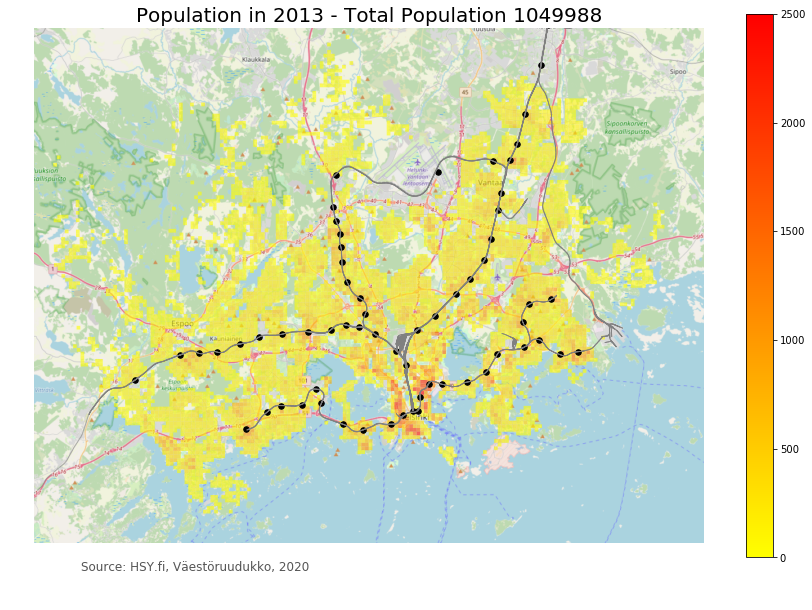

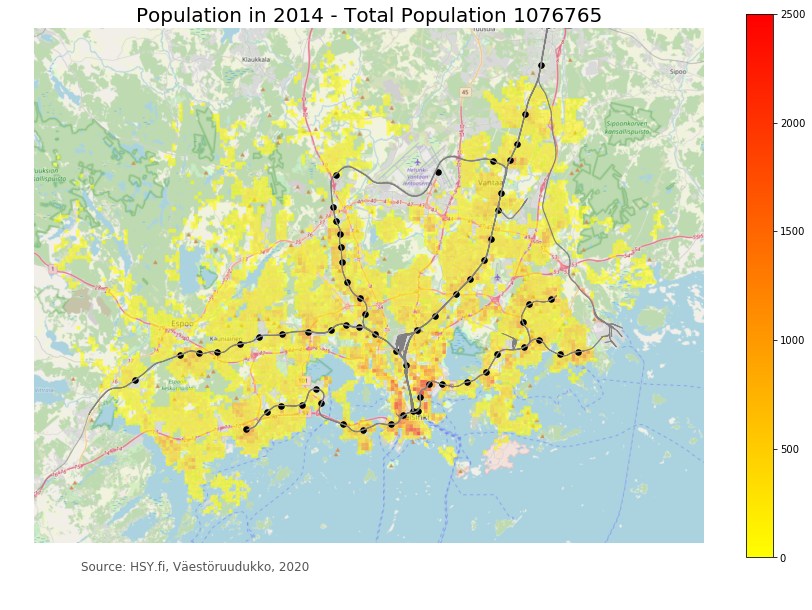

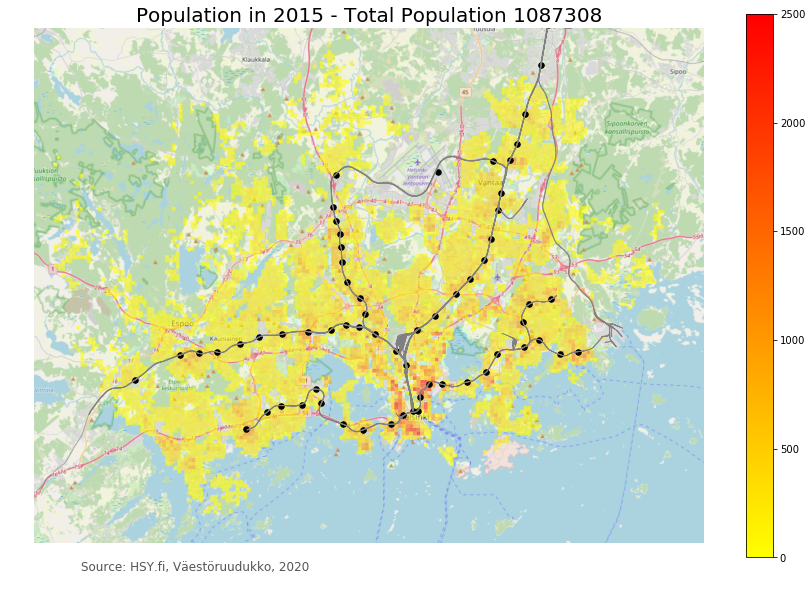

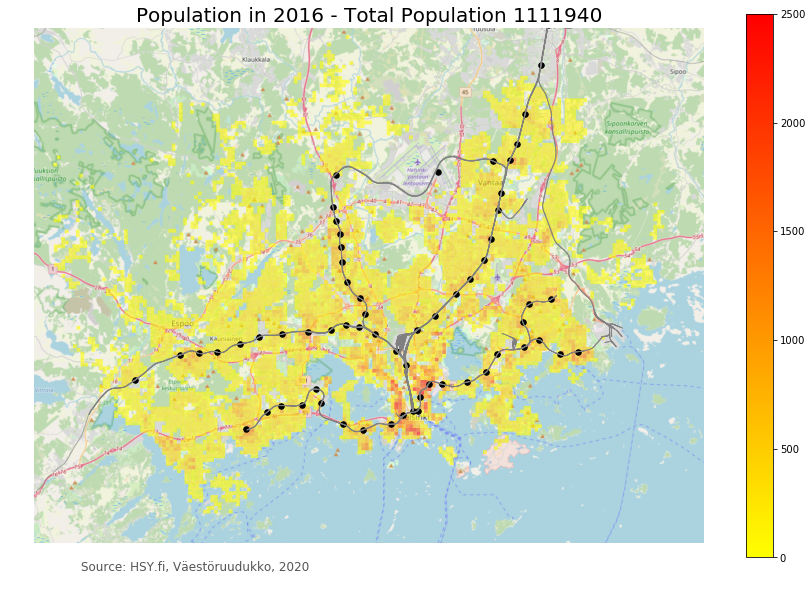

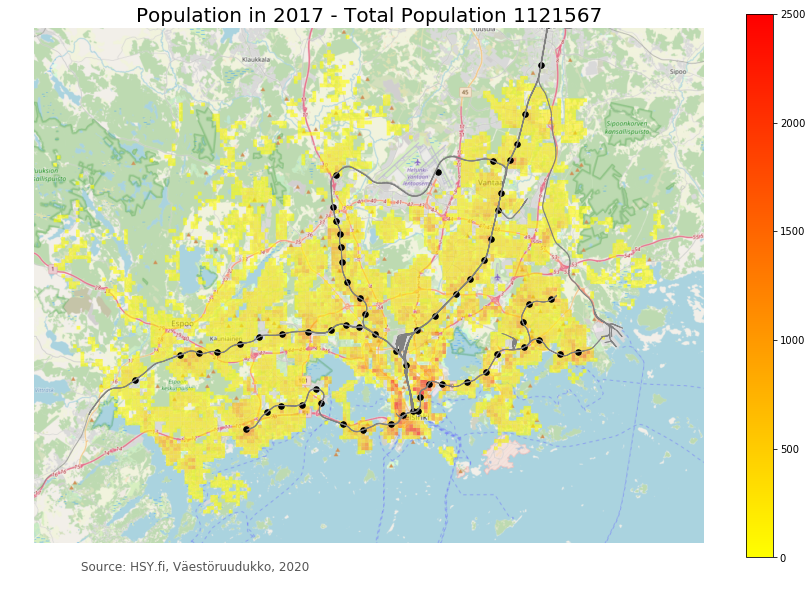

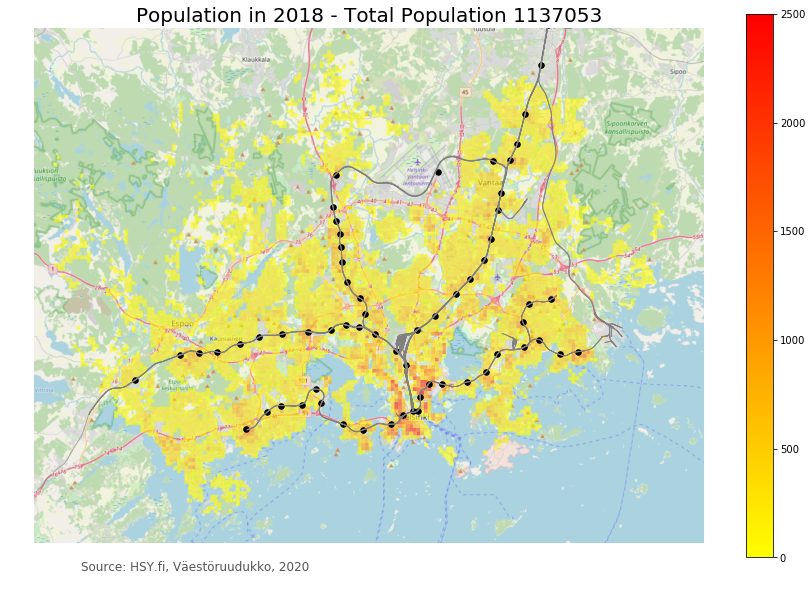

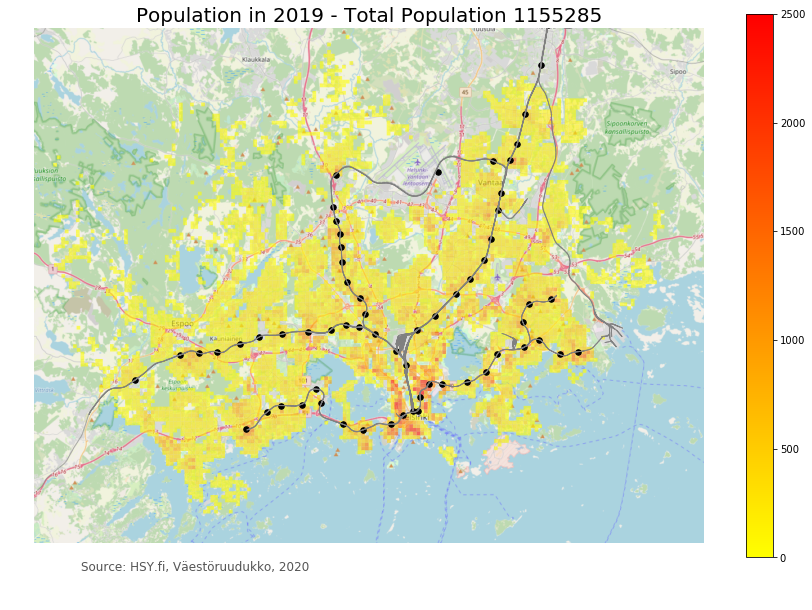

In [141]:
# Create and save figure of every year in the seleted list
for year in years:
    
    # set the range for the choropleth
    vmin, vmax = 0, max_population

    # Set column name which to visualize
    column_name = "pop"+str(year)
    
    # Define variable total population and change type to integer
    total_population = int(round(pop[column_name].sum()))

    # Define colour map (reverse autumn_r)
    cmap = matplotlib.cm.autumn
    cmap_reversed = matplotlib.cm.get_cmap('autumn_r')

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(15, 10))

    # Plot the population data
    pop.plot(ax=ax, column=column_name, cmap=cmap_reversed, linewidth=0.6, alpha=0.6)
    
    # Plot the rails
    rails.plot(ax=ax, color="gray", linewidth=0.8)
    
    # Plot stations
    stations.plot(ax=ax, color="black", markersize=30)

    # remove the axis
    ax.axis("off")

    # add a title
    ax.set_title("Population in " +str(year) + " - Total Population " + str(total_population), 
                 fontdict={"fontsize": "20", "fontweight" : "3"})

    # Add source to the bottom left corner
    ax.annotate("Source: HSY.fi, Väestöruudukko, 2020",xy=(0.1, .08), xycoords="figure fraction", 
                horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")
    
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=cmap_reversed, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm._A = []

    # Add the colorbar to the figure
    cbar = fig.colorbar(sm)

    # Add basemap with `OSM_A` style
    ctx.add_basemap(ax, url=ctx.tile_providers.OSM_A)

    # Crop the figure
    ax.set_xlim(2725000, 2816000)
    ax.set_ylim(8420000, 8490000)

    #saving our map as .png file.
    fig.savefig("annual_pics/"+column_name+".png", dpi=100)